# Analysis of Covid-19 NYC data
Looking at waves.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import utilities as u

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['figure.autolayout'] = True

def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = pd.read_csv("../trends/data-by-day.csv")
dat.rename(columns={"CASE_COUNT": "NEW_COVID_CASE_COUNT",
                   "date_of_interest" :"DATE_OF_INTEREST"},
           inplace=True)
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

NEW_COVID_CASE_COUNT  PROBABLE_CASE_COUNT  \
DATE_OF_INTEREST                                              
2020-02-29                           1                    0   
2020-03-01                           0                    0   
2020-03-02                           0                    0   
2020-03-03                           1                    0   
2020-03-04                           5                    0   

                  HOSPITALIZED_COUNT  DEATH_COUNT  PROBABLE_DEATH_COUNT  \
DATE_OF_INTEREST                                                          
2020-02-29                         1            0                     0   
2020-03-01                         1            0                     0   
2020-03-02                         2            0                     0   
2020-03-03                         7            0                     0   
2020-03-04                         2            0                     0   

                  CASE_COUNT_7DAY_AVG  ALL_CASE_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                 
2020-02-29                          0                        0   
2020-03-01                          0                        0   
2020-03-02                          0                        0   
2020-03-03                          0                        0   
2020-03-04                          0                        0   

                  HOSP_COUNT_7DAY_AVG  DEATH_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                              
2020-02-29                          0                     0   
2020-03-01                          0                     0   
2020-03-02                          0                     0   
2020-03-03                          0                     0   
2020-03-04                          0                     0   

                  ALL_DEATH_COUNT_7DAY_AVG  ...  SI_PROBABLE_CASE_COUNT  \
DATE_OF_INTEREST                            ...                           
2020-02-29                               0  ...                       0   
2020-03-01                               0  ...                       0   
2020-03-02                               0  ...                       0   
2020-03-03                               0  ...                       0   
2020-03-04                               0  ...                       0   

                  SI_HOSPITALIZED_COUNT  SI_DEATH_COUNT  \
DATE_OF_INTEREST                                          
2020-02-29                            0               0   
2020-03-01                            0               0   
2020-03-02                            0               0   
2020-03-03                            0               0   
2020-03-04                            0               0   

                  SI_PROBABLE_DEATH_COUNT  SI_CASE_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                    
2020-02-29                              0                       0   
2020-03-01                              0                       0   
2020-03-02                              0                       0   
2020-03-03                              0                       0   
2020-03-04                              0                       0   

                  SI_ALL_CASE_COUNT_7DAY_AVG  SI_HOSPITALIZED_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                               
2020-02-29                                 0                               0   
2020-03-01                                 0                               0   
2020-03-02                                 0                               0   
2020-03-03                                 0                               0   
2020-03-04                                 0                               0   

                  SI_DEATH_COUNT_7DAY_AVG  SI_ALL_DEATH_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                         
2020-02-29  

# Latest report
We generate a bar chart of the new cases/day.  Since there's weekly cyclicity, we also graph the 7 day rolling average.  The latter allows one to better see trends.  But the analysis is hampered by reporting delays - many sites don't promptly report the data.

In [5]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()
dat["Hospitalized/day, 7 day avg"] = dat["HOSPITALIZED_COUNT"].rolling(window="7D").mean()
dat["Deaths/day, 7 day avg"] = dat["DEATH_COUNT"].rolling(window="7D").mean()

## Full history
Note that the 7 day rolling average clearly shows the trends

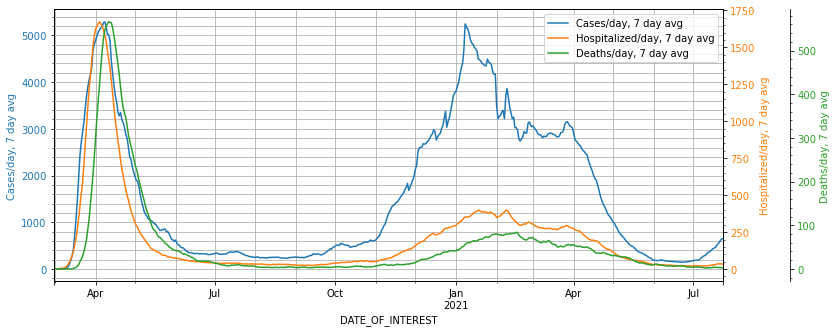

In [6]:
u.plot_multi(dat[["Cases/day, 7 day avg",
                  "Hospitalized/day, 7 day avg",
                  "Deaths/day, 7 day avg"]],
             figsize=(12, 5))

## First wave

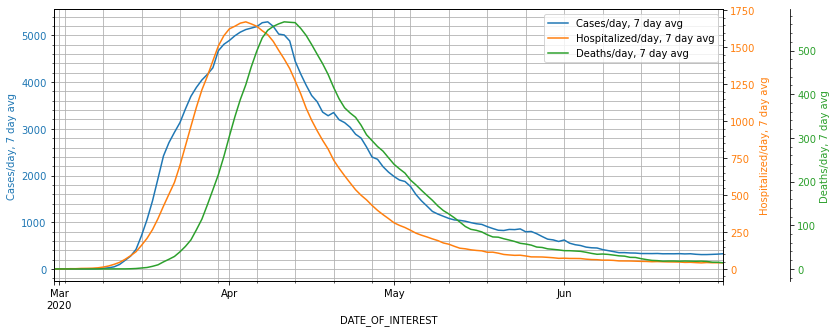

In [7]:
end = "2020-07-01"
period = dat[dat.index < end]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Second wave

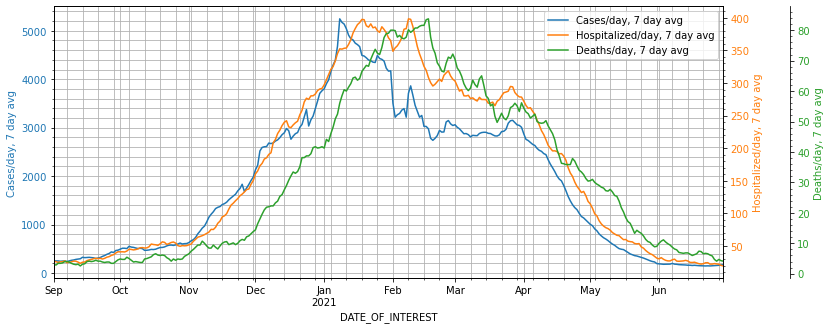

In [8]:
start = "2020-09-01"
end = "2021-07-01"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Third wave

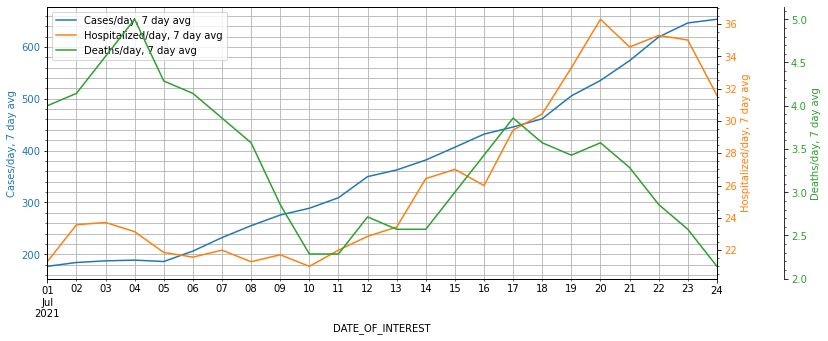

In [9]:
start = "2021-07-01"
period = dat[(dat.index >= start)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

# Peak analysis

## First wave
Oddly, cases/day peaked after hospitalized/day.  Cases/day peak is 4 days *after* hospitalized/day peak.  Deaths/day peak is 3 days later.

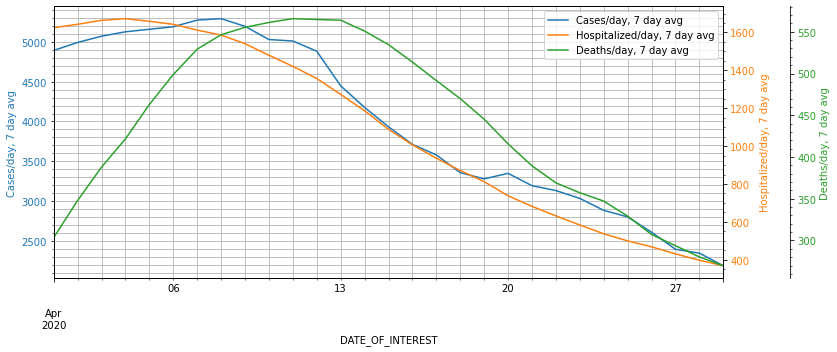

In [10]:
start = "2020-04-01"
end = "2020-04-30"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Second wave
Delays are different.  Peak hospitalized/day is 10 days after peak cases/day.  Peak deaths/day is ~Feb 16, vs Jan 8, about 39 days. 

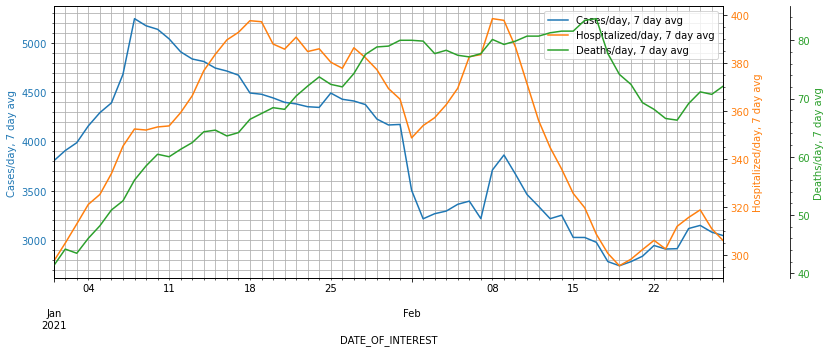

In [11]:
start = "2021-01-01"
end = "2021-03-01"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

# Rates
Looking at rates per case, but with shifts to account for delays

In [12]:
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"]/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"]/dat["Cases/day, 7 day avg"]

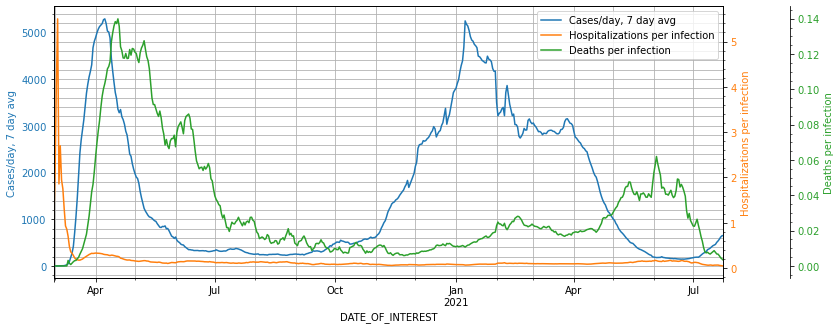

In [13]:
u.plot_multi(dat[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

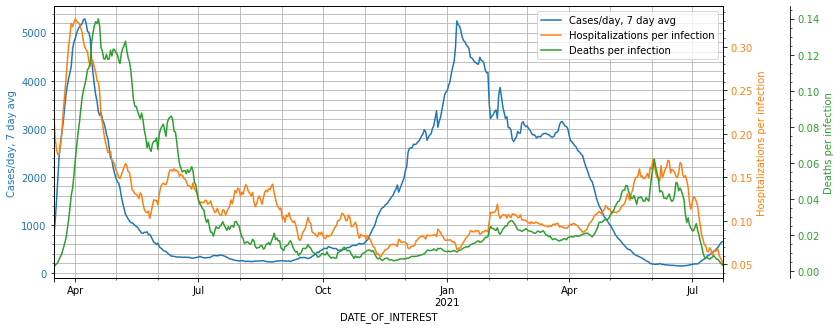

In [14]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## 7 day shift

In [15]:
shift = 7
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]

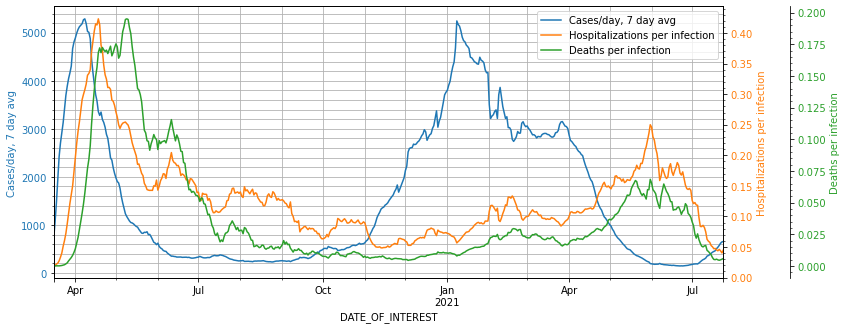

In [16]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## 14 day shift

In [17]:
shift = 14
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]

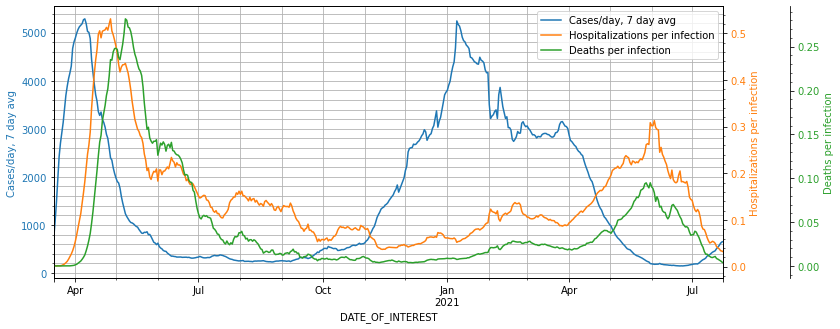

In [18]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

Rates shifted by -30 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      466.000000   
mean            1603.493952                        0.110173   
std             1502.828683                        0.098383   
min              145.428571                        0.028882   
25%              324.571429                        0.062566   
50%              826.071429                        0.097982   
75%             2878.928571                        0.132502   
max             5290.285714                        1.525020   

       Deaths per infection  
count            466.000000  
mean               0.024175  
std                0.046409  
min                0.008395  
25%                0.014755  
50%                0.018430  
75%                0.021999  
max                0.748999

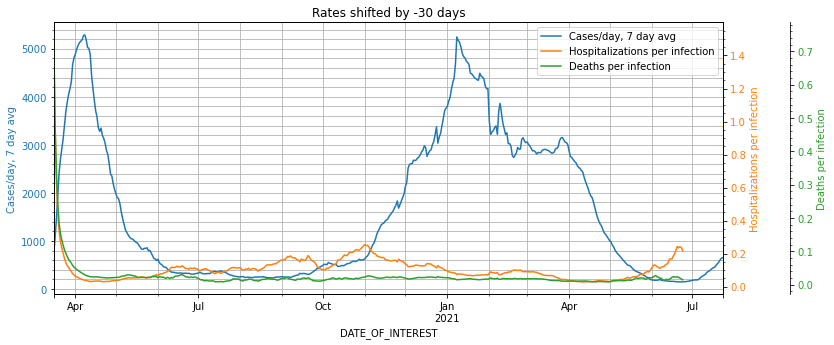

Rates shifted by -29 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      467.000000   
mean            1603.493952                        0.110894   
std             1502.828683                        0.104345   
min              145.428571                        0.030181   
25%              324.571429                        0.063715   
50%              826.071429                        0.098705   
75%             2878.928571                        0.131416   
max             5290.285714                        1.662730   

       Deaths per infection  
count            467.000000  
mean               0.024652  
std                0.048172  
min                0.008745  
25%                0.014778  
50%                0.018596  
75%                0.022067  
max                0.771817

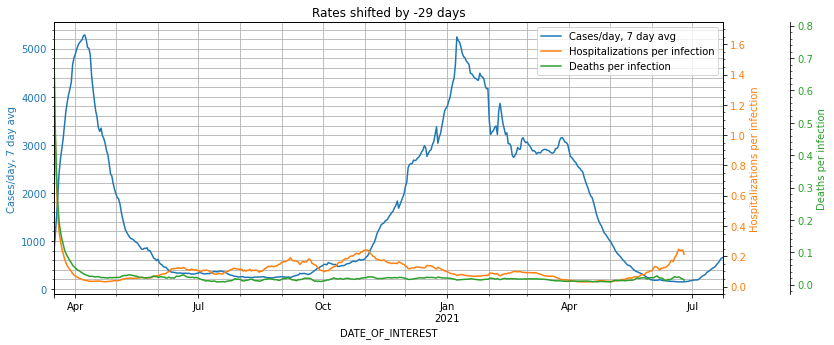

Rates shifted by -28 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      468.000000   
mean            1603.493952                        0.111693   
std             1502.828683                        0.110484   
min              145.428571                        0.031396   
25%              324.571429                        0.066168   
50%              826.071429                        0.098543   
75%             2878.928571                        0.131126   
max             5290.285714                        1.783627   

       Deaths per infection  
count            468.000000  
mean               0.025130  
std                0.049689  
min                0.008720  
25%                0.014964  
50%                0.018505  
75%                0.022400  
max                0.790032

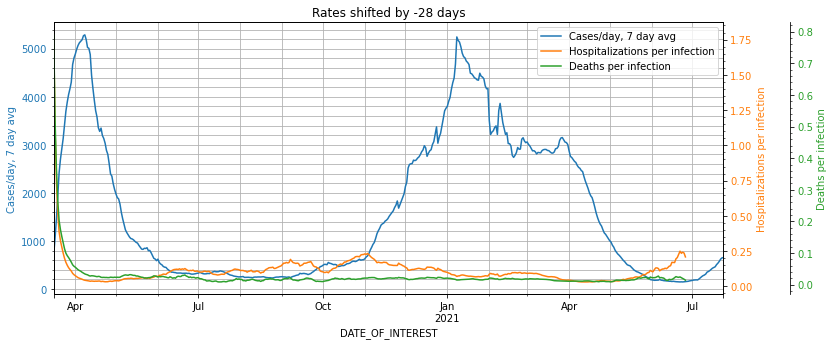

Rates shifted by -27 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      469.000000   
mean            1603.493952                        0.112553   
std             1502.828683                        0.116733   
min              145.428571                        0.031981   
25%              324.571429                        0.067397   
50%              826.071429                        0.098842   
75%             2878.928571                        0.130229   
max             5290.285714                        1.901121   

       Deaths per infection  
count            469.000000  
mean               0.025579  
std                0.050544  
min                0.008365  
25%                0.015020  
50%                0.018477  
75%                0.022681  
max                0.791233

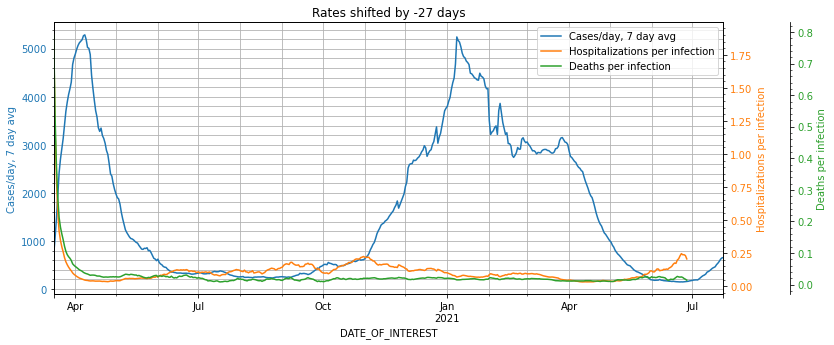

Rates shifted by -26 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      470.000000   
mean            1603.493952                        0.113406   
std             1502.828683                        0.122232   
min              145.428571                        0.032975   
25%              324.571429                        0.068259   
50%              826.071429                        0.097979   
75%             2878.928571                        0.128980   
max             5290.285714                        1.990993   

       Deaths per infection  
count            470.000000  
mean               0.026011  
std                0.051119  
min                0.008504  
25%                0.015319  
50%                0.018486  
75%                0.022916  
max                0.792634

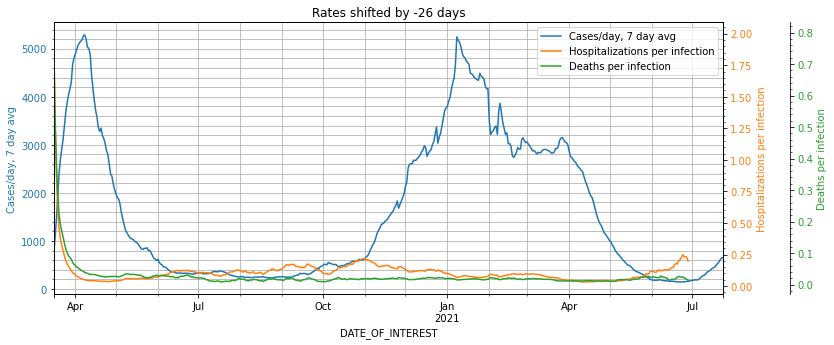

Rates shifted by -25 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      471.000000   
mean            1603.493952                        0.114252   
std             1502.828683                        0.127241   
min              145.428571                        0.034319   
25%              324.571429                        0.068884   
50%              826.071429                        0.098780   
75%             2878.928571                        0.128031   
max             5290.285714                        2.073058   

       Deaths per infection  
count            471.000000  
mean               0.026418  
std                0.051312  
min                0.008661  
25%                0.015412  
50%                0.018203  
75%                0.023139  
max                0.786229

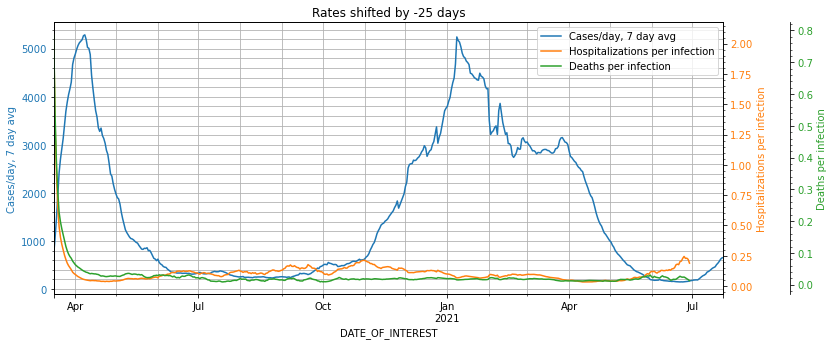

Rates shifted by -24 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      472.000000   
mean            1603.493952                        0.115120   
std             1502.828683                        0.132214   
min              145.428571                        0.035862   
25%              324.571429                        0.069273   
50%              826.071429                        0.100099   
75%             2878.928571                        0.128334   
max             5290.285714                        2.158727   

       Deaths per infection  
count            472.000000  
mean               0.026812  
std                0.051275  
min                0.008664  
25%                0.015451  
50%                0.017972  
75%                0.023589  
max                0.778022

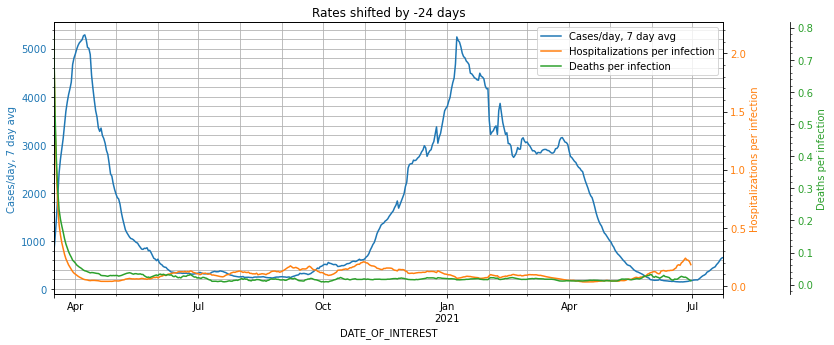

Rates shifted by -23 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      473.000000   
mean            1603.493952                        0.115979   
std             1502.828683                        0.136498   
min              145.428571                        0.037083   
25%              324.571429                        0.070151   
50%              826.071429                        0.100585   
75%             2878.928571                        0.128596   
max             5290.285714                        2.222178   

       Deaths per infection  
count            473.000000  
mean               0.027187  
std                0.050993  
min                0.008435  
25%                0.015366  
50%                0.017956  
75%                0.023653  
max                0.765612

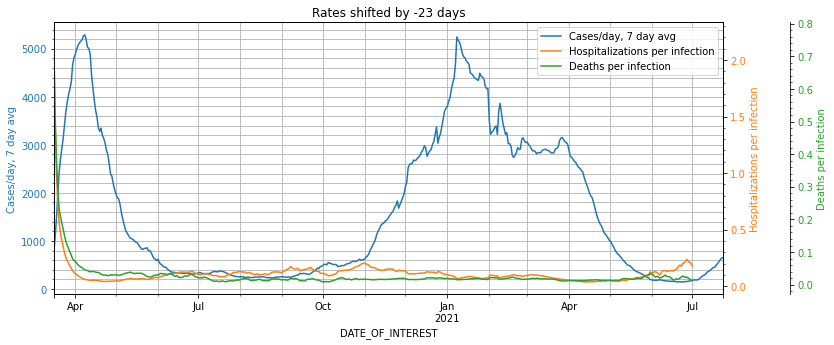

Rates shifted by -22 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      474.000000   
mean            1603.493952                        0.116782   
std             1502.828683                        0.139664   
min              145.428571                        0.038477   
25%              324.571429                        0.071173   
50%              826.071429                        0.100761   
75%             2878.928571                        0.127593   
max             5290.285714                        2.259408   

       Deaths per infection  
count            474.000000  
mean               0.027527  
std                0.050233  
min                0.008105  
25%                0.015169  
50%                0.017900  
75%                0.024060  
max                0.741393

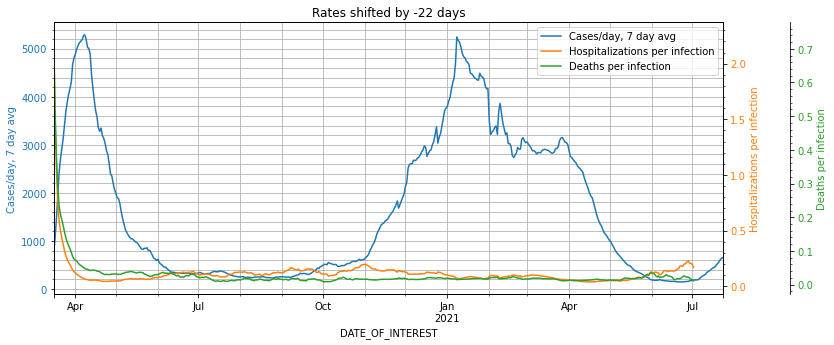

Rates shifted by -21 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      475.000000   
mean            1603.493952                        0.117574   
std             1502.828683                        0.142534   
min              145.428571                        0.040046   
25%              324.571429                        0.072120   
50%              826.071429                        0.102525   
75%             2878.928571                        0.126627   
max             5290.285714                        2.302042   

       Deaths per infection  
count            475.000000  
mean               0.027803  
std                0.048713  
min                0.008037  
25%                0.015173  
50%                0.017841  
75%                0.024352  
max                0.698759

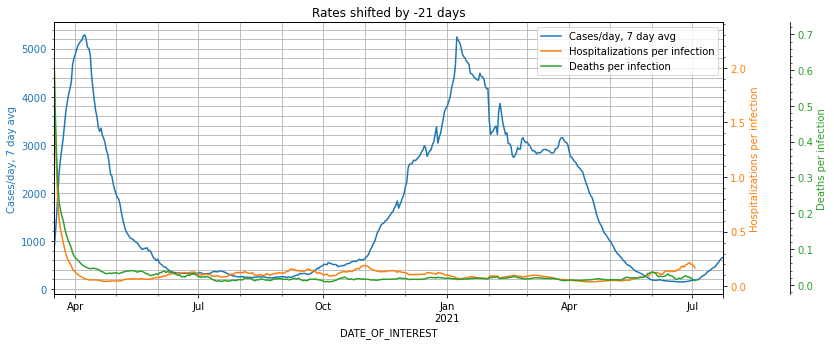

Rates shifted by -20 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      476.000000   
mean            1603.493952                        0.118343   
std             1502.828683                        0.144619   
min              145.428571                        0.041091   
25%              324.571429                        0.073132   
50%              826.071429                        0.102508   
75%             2878.928571                        0.126283   
max             5290.285714                        2.324259   

       Deaths per infection  
count            476.000000  
mean               0.028028  
std                0.046642  
min                0.008218  
25%                0.015041  
50%                0.017909  
75%                0.025025  
max                0.648519

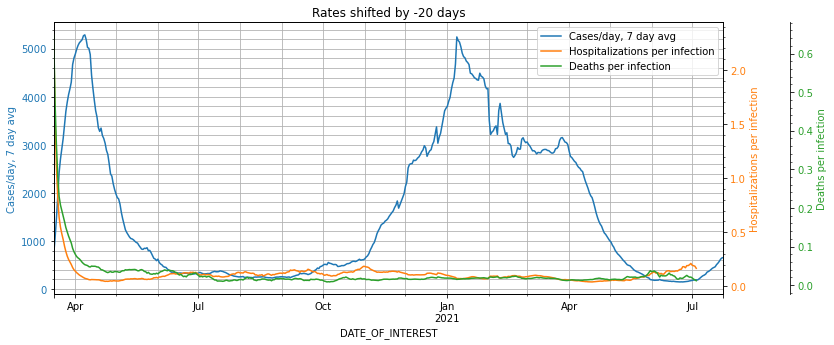

Rates shifted by -19 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      477.000000   
mean            1603.493952                        0.119119   
std             1502.828683                        0.146291   
min              145.428571                        0.042368   
25%              324.571429                        0.074930   
50%              826.071429                        0.104108   
75%             2878.928571                        0.125698   
max             5290.285714                        2.343875   

       Deaths per infection  
count            477.000000  
mean               0.028204  
std                0.044127  
min                0.007519  
25%                0.014894  
50%                0.017923  
75%                0.025011  
max                0.590873

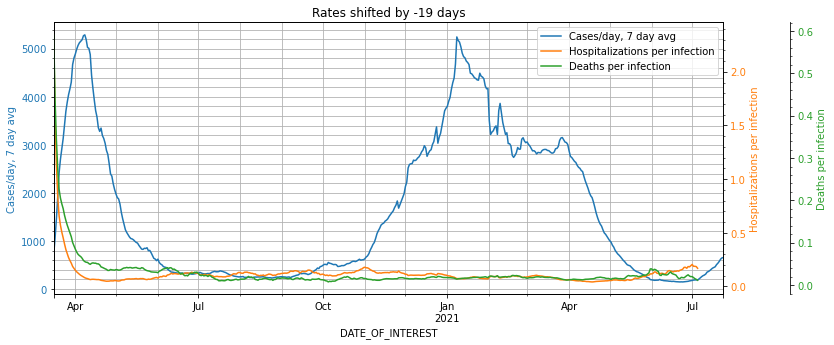

Rates shifted by -18 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      478.000000   
mean            1603.493952                        0.119814   
std             1502.828683                        0.146750   
min              145.428571                        0.044096   
25%              324.571429                        0.076568   
50%              826.071429                        0.103059   
75%             2878.928571                        0.124751   
max             5290.285714                        2.331465   

       Deaths per infection  
count            478.000000  
mean               0.028366  
std                0.041699  
min                0.007750  
25%                0.014743  
50%                0.017874  
75%                0.025875  
max                0.543435

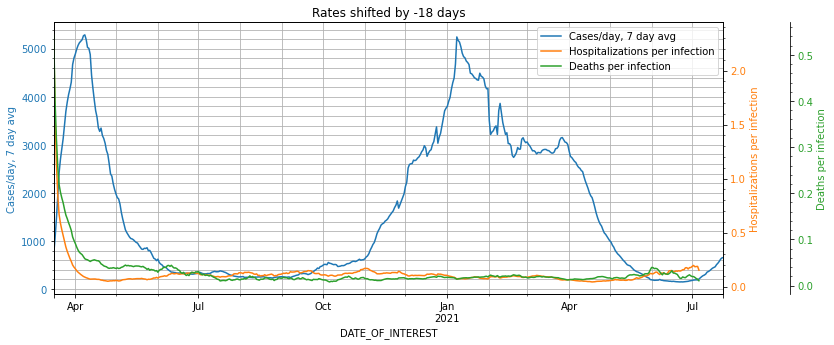

Rates shifted by -17 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      479.000000   
mean            1603.493952                        0.120420   
std             1502.828683                        0.146136   
min              145.428571                        0.046345   
25%              324.571429                        0.078423   
50%              826.071429                        0.103200   
75%             2878.928571                        0.123506   
max             5290.285714                        2.302242   

       Deaths per infection  
count            479.000000  
mean               0.028498  
std                0.039112  
min                0.007838  
25%                0.014644  
50%                0.017937  
75%                0.026733  
max                0.487390

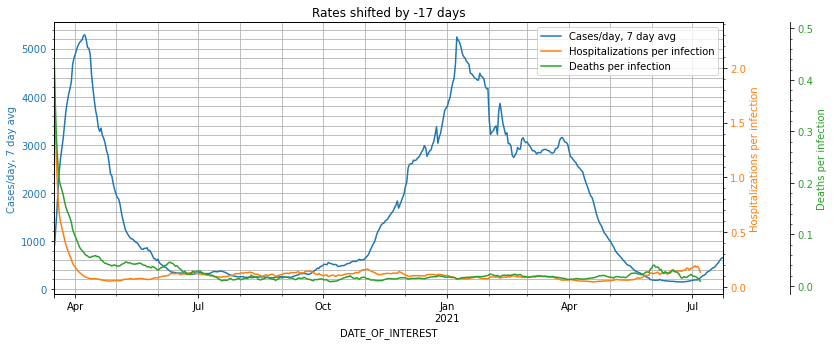

Rates shifted by -16 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      480.000000   
mean            1603.493952                        0.120982   
std             1502.828683                        0.145141   
min              145.428571                        0.049029   
25%              324.571429                        0.080980   
50%              826.071429                        0.103116   
75%             2878.928571                        0.123389   
max             5290.285714                        2.277022   

       Deaths per infection  
count            480.000000  
mean               0.028601  
std                0.036368  
min                0.008035  
25%                0.014614  
50%                0.018014  
75%                0.027455  
max                0.425140

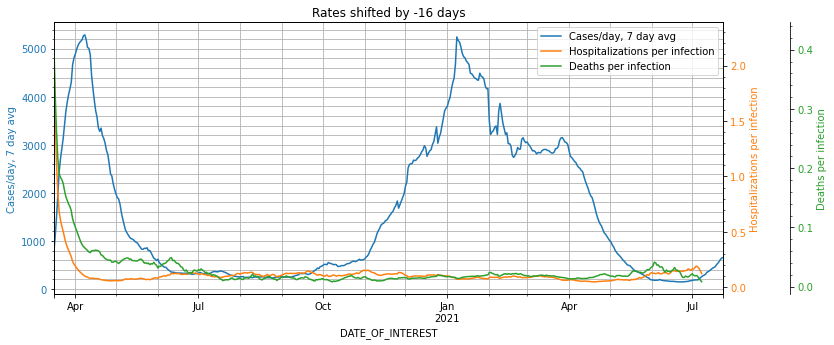

Rates shifted by -15 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      481.000000   
mean            1603.493952                        0.121448   
std             1502.828683                        0.142736   
min              145.428571                        0.052159   
25%              324.571429                        0.083391   
50%              826.071429                        0.103286   
75%             2878.928571                        0.122566   
max             5290.285714                        2.212370   

       Deaths per infection  
count            481.000000  
mean               0.028676  
std                0.033592  
min                0.007768  
25%                0.014457  
50%                0.018280  
75%                0.028183  
max                0.360488

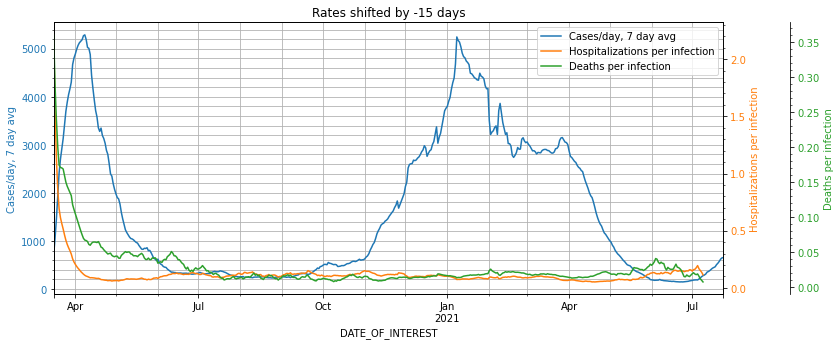

Rates shifted by -14 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      482.000000   
mean            1603.493952                        0.121799   
std             1502.828683                        0.138716   
min              145.428571                        0.054950   
25%              324.571429                        0.084912   
50%              826.071429                        0.102357   
75%             2878.928571                        0.122376   
max             5290.285714                        2.115292   

       Deaths per infection  
count            482.000000  
mean               0.028746  
std                0.031060  
min                0.007418  
25%                0.014397  
50%                0.018281  
75%                0.028513  
max                0.302442

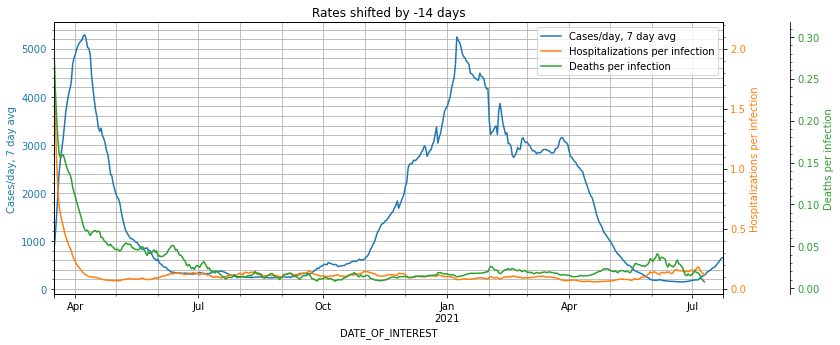

Rates shifted by -13 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      483.000000   
mean            1603.493952                        0.121984   
std             1502.828683                        0.132662   
min              145.428571                        0.058458   
25%              324.571429                        0.085904   
50%              826.071429                        0.101947   
75%             2878.928571                        0.121633   
max             5290.285714                        1.974179   

       Deaths per infection  
count            483.000000  
mean               0.028829  
std                0.028952  
min                0.006932  
25%                0.014360  
50%                0.018255  
75%                0.029439  
max                0.253803

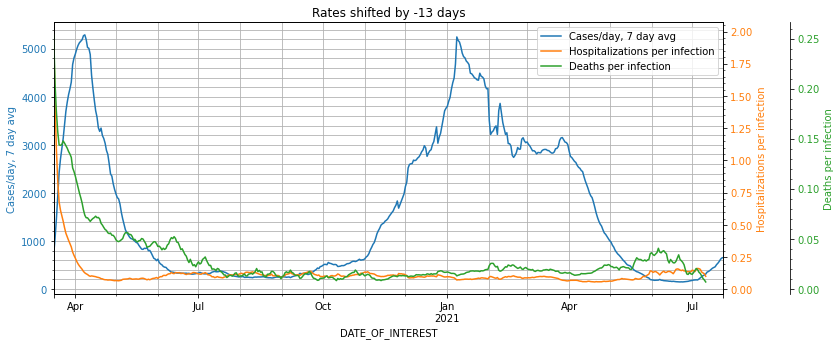

Rates shifted by -12 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      484.000000   
mean            1603.493952                        0.122040   
std             1502.828683                        0.125569   
min              145.428571                        0.061619   
25%              324.571429                        0.087909   
50%              826.071429                        0.102028   
75%             2878.928571                        0.121722   
max             5290.285714                        1.828863   

       Deaths per infection  
count            484.000000  
mean               0.028923  
std                0.027216  
min                0.006125  
25%                0.014230  
50%                0.018198  
75%                0.030643  
max                0.205564

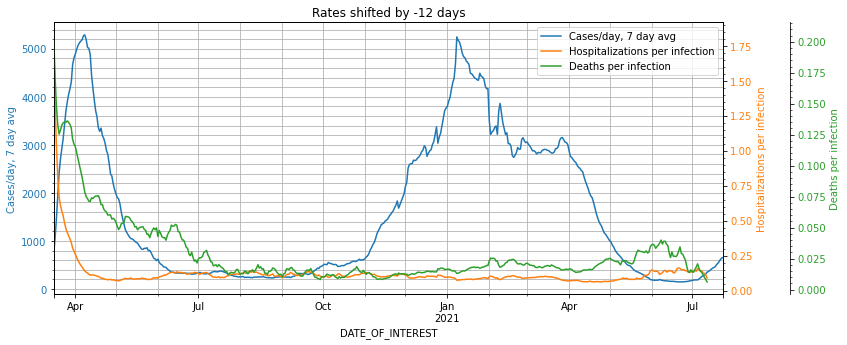

Rates shifted by -11 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      485.000000   
mean            1603.493952                        0.122057   
std             1502.828683                        0.118403   
min              145.428571                        0.064132   
25%              324.571429                        0.088973   
50%              826.071429                        0.101232   
75%             2878.928571                        0.120745   
max             5290.285714                        1.698759   

       Deaths per infection  
count            485.000000  
mean               0.029032  
std                0.025876  
min                0.005908  
25%                0.014108  
50%                0.018320  
75%                0.032350  
max                0.159728

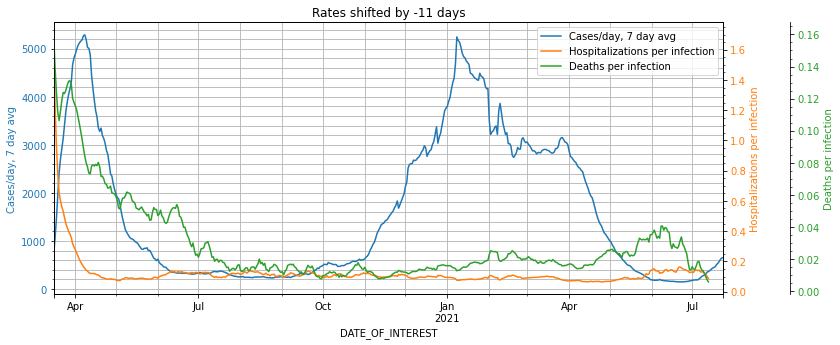

Rates shifted by -10 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      486.000000   
mean            1603.493952                        0.121985   
std             1502.828683                        0.110286   
min              145.428571                        0.067608   
25%              324.571429                        0.090838   
50%              826.071429                        0.100312   
75%             2878.928571                        0.121770   
max             5290.285714                        1.534428   

       Deaths per infection  
count            486.000000  
mean               0.029180  
std                0.025029  
min                0.005612  
25%                0.013957  
50%                0.018355  
75%                0.034073  
max                0.127010

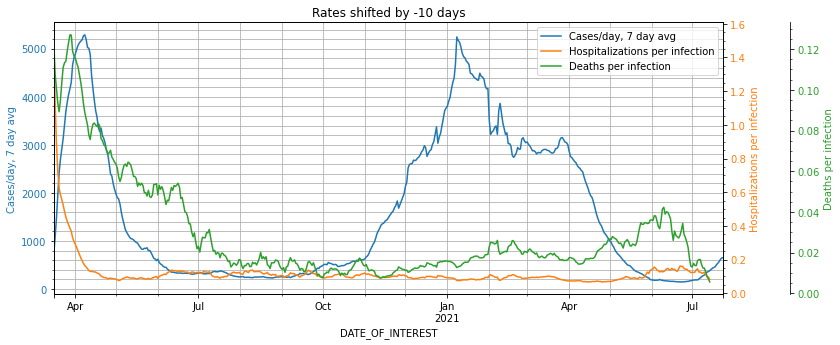

Rates shifted by -9 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      487.000000   
mean            1603.493952                        0.121817   
std             1502.828683                        0.101355   
min              145.428571                        0.069411   
25%              324.571429                        0.091313   
50%              826.071429                        0.100036   
75%             2878.928571                        0.121999   
max             5290.285714                        1.352082   

       Deaths per infection  
count            487.000000  
mean               0.029357  
std                0.024587  
min                0.005271  
25%                0.013964  
50%                0.018690  
75%                0.035286  
max                0.122881

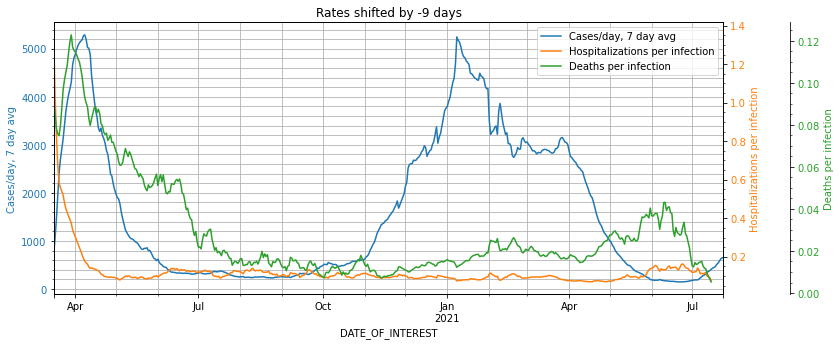

Rates shifted by -8 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      488.000000   
mean            1603.493952                        0.121578   
std             1502.828683                        0.092131   
min              145.428571                        0.072040   
25%              324.571429                        0.091000   
50%              826.071429                        0.100868   
75%             2878.928571                        0.122484   
max             5290.285714                        1.167534   

       Deaths per infection  
count            488.000000  
mean               0.029584  
std                0.024543  
min                0.004964  
25%                0.013826  
50%                0.019141  
75%                0.036368  
max                0.115815

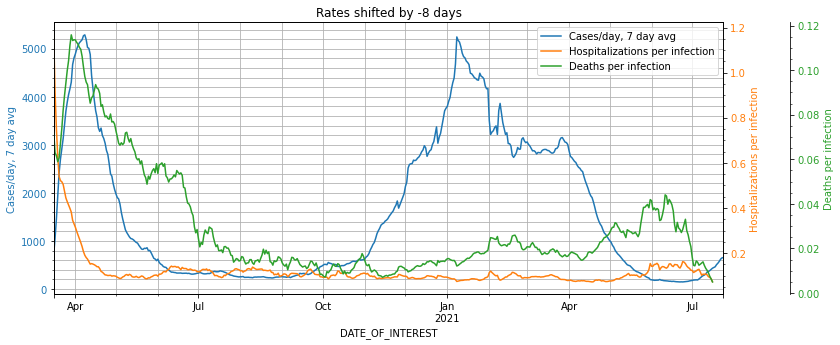

Rates shifted by -7 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      489.000000   
mean            1603.493952                        0.121302   
std             1502.828683                        0.082996   
min              145.428571                        0.070856   
25%              324.571429                        0.090531   
50%              826.071429                        0.102359   
75%             2878.928571                        0.122412   
max             5290.285714                        0.982786   

       Deaths per infection  
count            489.000000  
mean               0.029862  
std                0.024815  
min                0.004809  
25%                0.013571  
50%                0.019438  
75%                0.036928  
max                0.111721

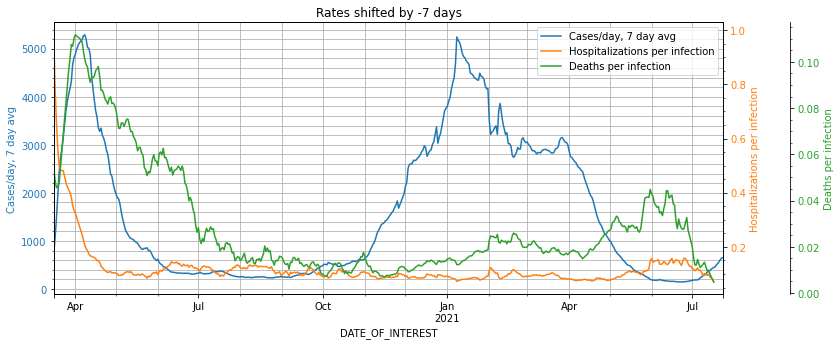

Rates shifted by -6 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      490.000000   
mean            1603.493952                        0.121043   
std             1502.828683                        0.074725   
min              145.428571                        0.068421   
25%              324.571429                        0.089361   
50%              826.071429                        0.102478   
75%             2878.928571                        0.122871   
max             5290.285714                        0.821857   

       Deaths per infection  
count            490.000000  
mean               0.030190  
std                0.025349  
min                0.004644  
25%                0.013275  
50%                0.019551  
75%                0.036467  
max                0.109704

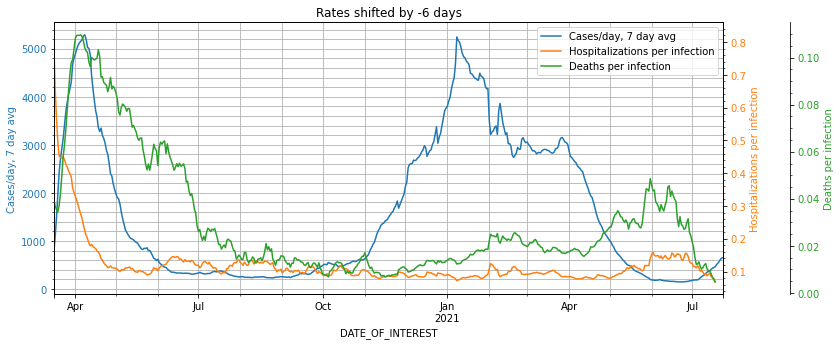

Rates shifted by -5 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      491.000000   
mean            1603.493952                        0.120905   
std             1502.828683                        0.068151   
min              145.428571                        0.062447   
25%              324.571429                        0.088612   
50%              826.071429                        0.102821   
75%             2878.928571                        0.124698   
max             5290.285714                        0.710168   

       Deaths per infection  
count            491.000000  
mean               0.030570  
std                0.026091  
min                0.004238  
25%                0.013100  
50%                0.019991  
75%                0.035972  
max                0.109031

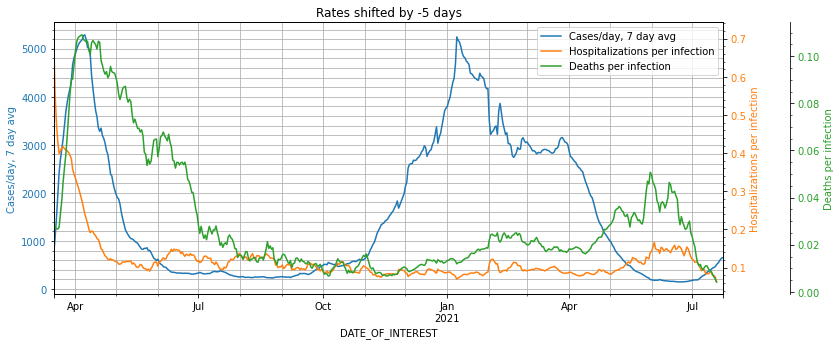

Rates shifted by -4 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      492.000000   
mean            1603.493952                        0.120853   
std             1502.828683                        0.062704   
min              145.428571                        0.058981   
25%              324.571429                        0.089156   
50%              826.071429                        0.103005   
75%             2878.928571                        0.127334   
max             5290.285714                        0.597078   

       Deaths per infection  
count            492.000000  
mean               0.030996  
std                0.027006  
min                0.004003  
25%                0.012913  
50%                0.020251  
75%                0.036814  
max                0.113210

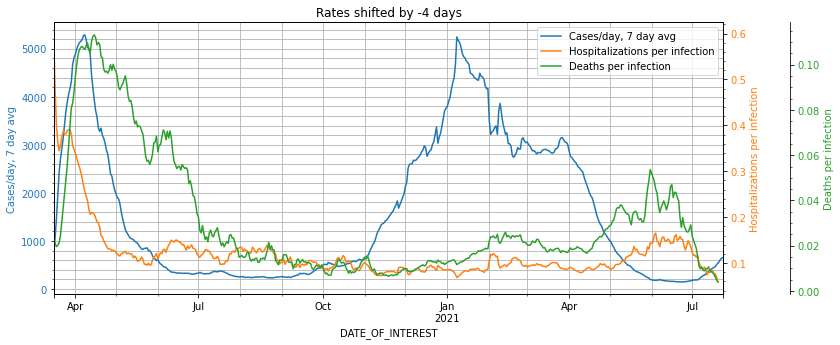

Rates shifted by -3 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      493.000000   
mean            1603.493952                        0.120853   
std             1502.828683                        0.058199   
min              145.428571                        0.055057   
25%              324.571429                        0.088699   
50%              826.071429                        0.102675   
75%             2878.928571                        0.129921   
max             5290.285714                        0.478383   

       Deaths per infection  
count            493.000000  
mean               0.031461  
std                0.028079  
min                0.003737  
25%                0.012788  
50%                0.020033  
75%                0.038019  
max                0.119926

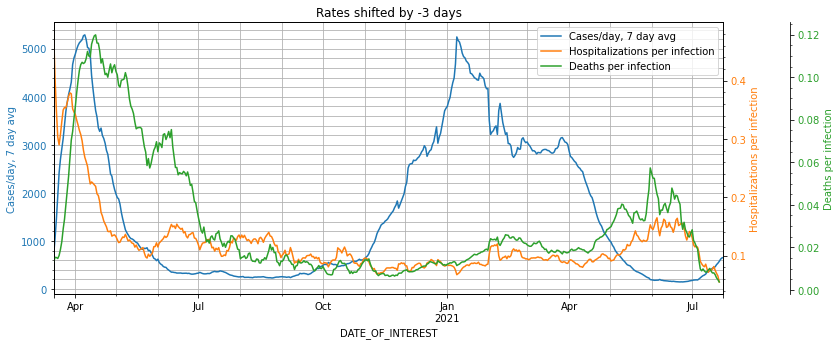

Rates shifted by -2 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      494.000000   
mean            1603.493952                        0.120935   
std             1502.828683                        0.054937   
min              145.428571                        0.050992   
25%              324.571429                        0.088465   
50%              826.071429                        0.104714   
75%             2878.928571                        0.132870   
max             5290.285714                        0.373899   

       Deaths per infection  
count            494.000000  
mean               0.031971  
std                0.029281  
min                0.003461  
25%                0.012398  
50%                0.020787  
75%                0.038969  
max                0.126544

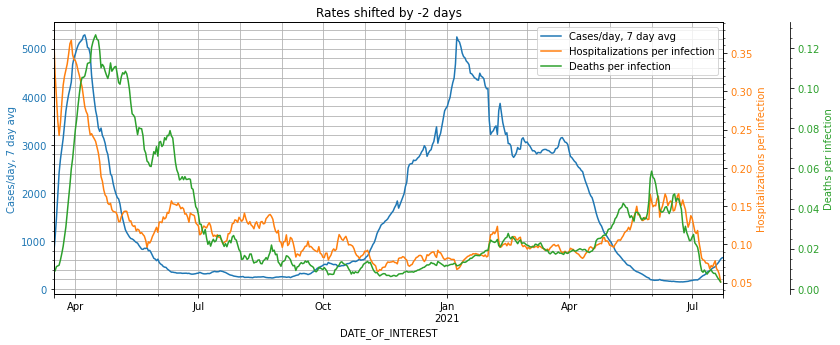

Rates shifted by -1 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      495.000000   
mean            1603.493952                        0.121134   
std             1502.828683                        0.053059   
min              145.428571                        0.048861   
25%              324.571429                        0.087726   
50%              826.071429                        0.106648   
75%             2878.928571                        0.136711   
max             5290.285714                        0.350595   

       Deaths per infection  
count            495.000000  
mean               0.032528  
std                0.030604  
min                0.003316  
25%                0.012032  
50%                0.020474  
75%                0.039829  
max                0.132616

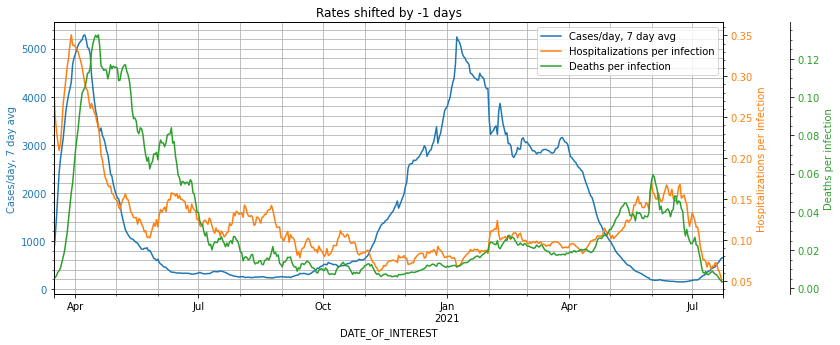

Rates shifted by 0 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.121477   
std             1502.828683                        0.052491   
min              145.428571                        0.048327   
25%              324.571429                        0.087482   
50%              826.071429                        0.108175   
75%             2878.928571                        0.138919   
max             5290.285714                        0.332272   

       Deaths per infection  
count            496.000000  
mean               0.033125  
std                0.032025  
min                0.003002  
25%                0.011641  
50%                0.021051  
75%                0.040770  
max                0.139934

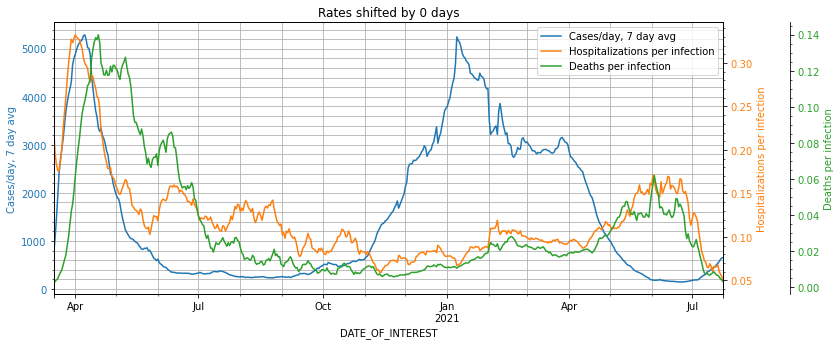

Rates shifted by 1 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.122123   
std             1502.828683                        0.053019   
min              145.428571                        0.053575   
25%              324.571429                        0.088227   
50%              826.071429                        0.110194   
75%             2878.928571                        0.140486   
max             5290.285714                        0.325587   

       Deaths per infection  
count            496.000000  
mean               0.033826  
std                0.033542  
min                0.001401  
25%                0.011380  
50%                0.021258  
75%                0.042841  
max                0.146401

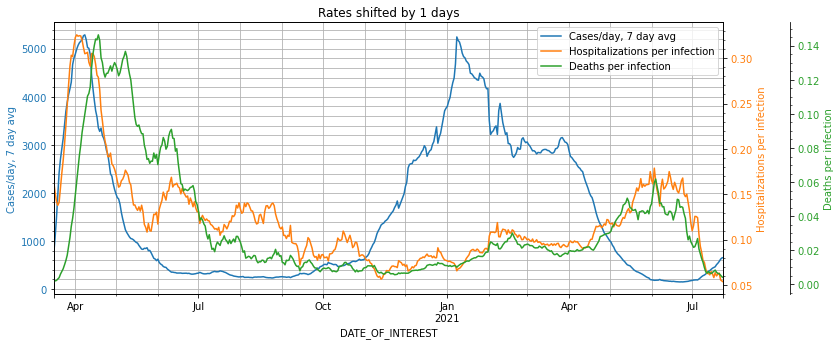

Rates shifted by 2 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.122921   
std             1502.828683                        0.054486   
min              145.428571                        0.053504   
25%              324.571429                        0.087687   
50%              826.071429                        0.111161   
75%             2878.928571                        0.140885   
max             5290.285714                        0.324907   

       Deaths per infection  
count            496.000000  
mean               0.034569  
std                0.035153  
min                0.000600  
25%                0.011110  
50%                0.021350  
75%                0.044500  
max                0.152995

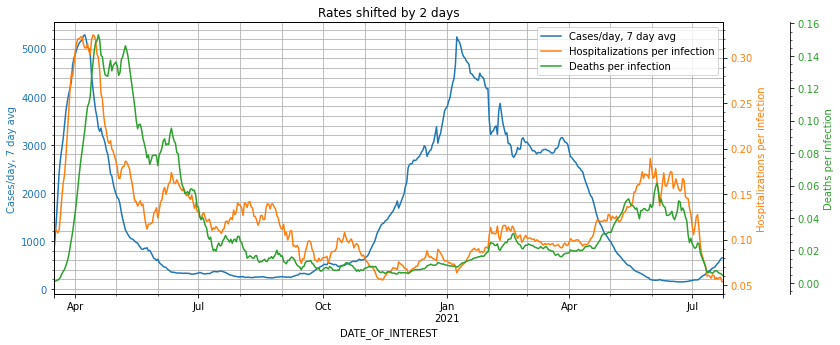

Rates shifted by 3 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.123868   
std             1502.828683                        0.056663   
min              145.428571                        0.051427   
25%              324.571429                        0.086962   
50%              826.071429                        0.111180   
75%             2878.928571                        0.143542   
max             5290.285714                        0.344968   

       Deaths per infection  
count            496.000000  
mean               0.035353  
std                0.036850  
min                0.000200  
25%                0.010832  
50%                0.021449  
75%                0.045210  
max                0.159207

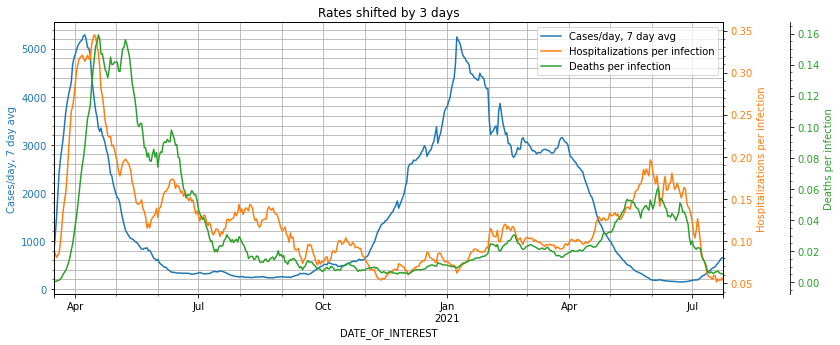

Rates shifted by 4 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.124967   
std             1502.828683                        0.059437   
min              145.428571                        0.048572   
25%              324.571429                        0.086248   
50%              826.071429                        0.111454   
75%             2878.928571                        0.146261   
max             5290.285714                        0.365434   

       Deaths per infection  
count            496.000000  
mean               0.036177  
std                0.038623  
min                0.000136  
25%                0.010593  
50%                0.021439  
75%                0.046075  
max                0.165237

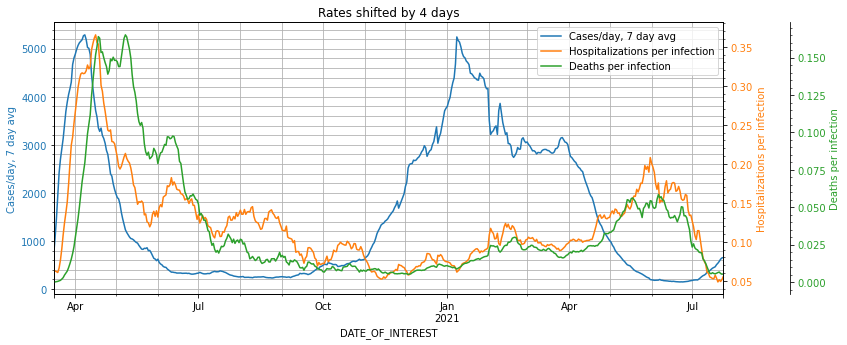

Rates shifted by 5 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.126219   
std             1502.828683                        0.062692   
min              145.428571                        0.043095   
25%              324.571429                        0.084744   
50%              826.071429                        0.110746   
75%             2878.928571                        0.150417   
max             5290.285714                        0.382709   

       Deaths per infection  
count            496.000000  
mean               0.037046  
std                0.040489  
min                0.000098  
25%                0.010480  
50%                0.021488  
75%                0.047929  
max                0.178108

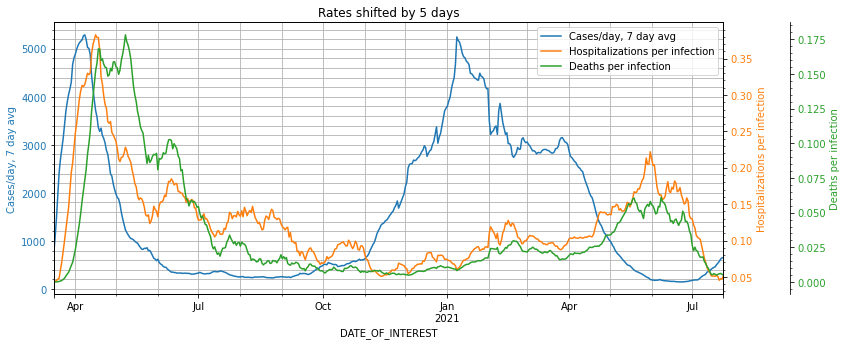

Rates shifted by 6 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.127635   
std             1502.828683                        0.066332   
min              145.428571                        0.029223   
25%              324.571429                        0.082682   
50%              826.071429                        0.110542   
75%             2878.928571                        0.153869   
max             5290.285714                        0.404101   

       Deaths per infection  
count            496.000000  
mean               0.037955  
std                0.042434  
min                0.000000  
25%                0.010455  
50%                0.021813  
75%                0.048938  
max                0.186793

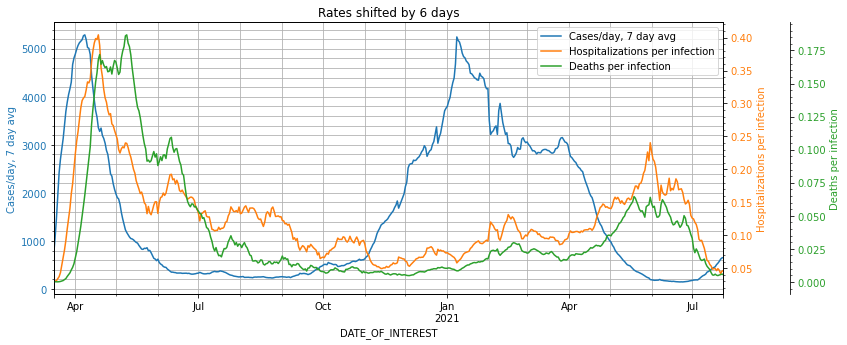

Rates shifted by 7 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.129207   
std             1502.828683                        0.070269   
min              145.428571                        0.019015   
25%              324.571429                        0.080944   
50%              826.071429                        0.112829   
75%             2878.928571                        0.158527   
max             5290.285714                        0.423205   

       Deaths per infection  
count            496.000000  
mean               0.038908  
std                0.044463  
min                0.000000  
25%                0.010235  
50%                0.021879  
75%                0.049106  
max                0.195063

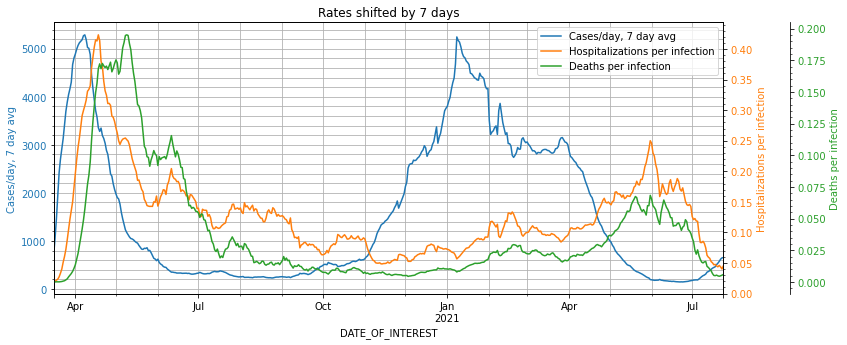

Rates shifted by 8 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.130923   
std             1502.828683                        0.074490   
min              145.428571                        0.011809   
25%              324.571429                        0.079490   
50%              826.071429                        0.115799   
75%             2878.928571                        0.161960   
max             5290.285714                        0.440648   

       Deaths per infection  
count            496.000000  
mean               0.039897  
std                0.046570  
min                0.000000  
25%                0.009938  
50%                0.022059  
75%                0.049326  
max                0.206633

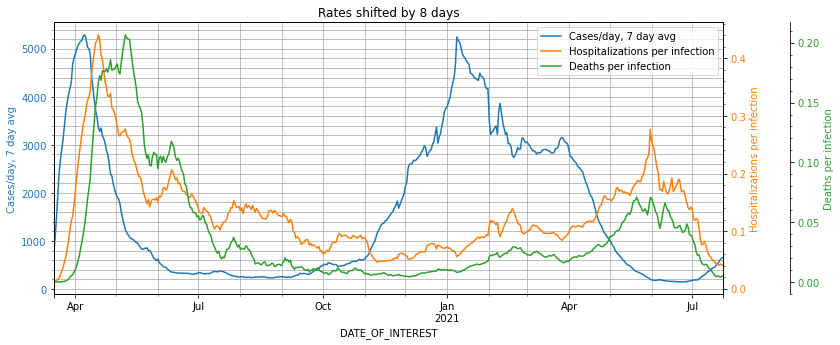

Rates shifted by 9 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.132790   
std             1502.828683                        0.078938   
min              145.428571                        0.007996   
25%              324.571429                        0.079315   
50%              826.071429                        0.115891   
75%             2878.928571                        0.166445   
max             5290.285714                        0.458858   

       Deaths per infection  
count            496.000000  
mean               0.040923  
std                0.048747  
min                0.000000  
25%                0.009874  
50%                0.022100  
75%                0.050435  
max                0.218924

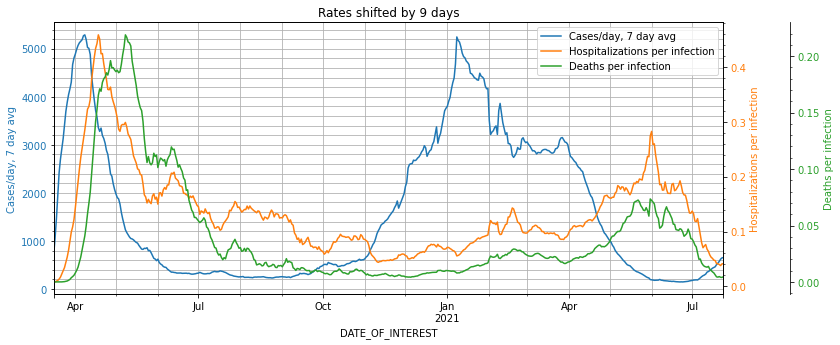

Rates shifted by 10 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.134793   
std             1502.828683                        0.083623   
min              145.428571                        0.005692   
25%              324.571429                        0.079065   
50%              826.071429                        0.115375   
75%             2878.928571                        0.169968   
max             5290.285714                        0.472345   

       Deaths per infection  
count            496.000000  
mean               0.041989  
std                0.051006  
min                0.000000  
25%                0.009700  
50%                0.022170  
75%                0.051719  
max                0.229600

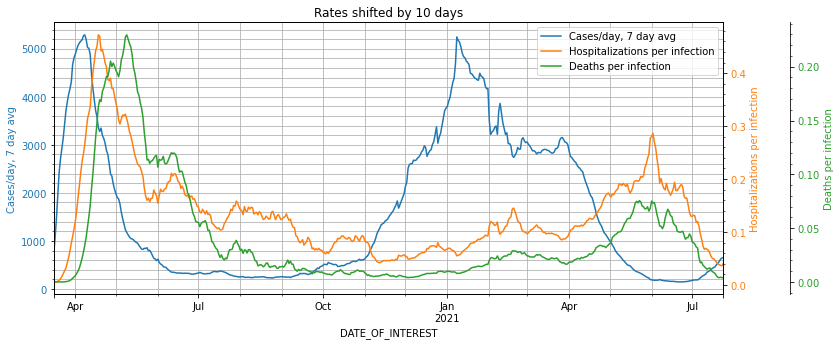

Rates shifted by 11 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.136933   
std             1502.828683                        0.088549   
min              145.428571                        0.004120   
25%              324.571429                        0.076957   
50%              826.071429                        0.117182   
75%             2878.928571                        0.177783   
max             5290.285714                        0.483516   

       Deaths per infection  
count            496.000000  
mean               0.043094  
std                0.053364  
min                0.000000  
25%                0.009414  
50%                0.022357  
75%                0.052875  
max                0.239199

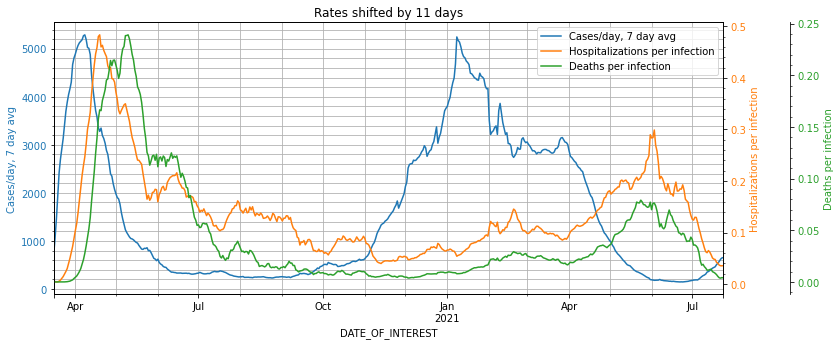

Rates shifted by 12 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.139207   
std             1502.828683                        0.093709   
min              145.428571                        0.003100   
25%              324.571429                        0.076869   
50%              826.071429                        0.116486   
75%             2878.928571                        0.181962   
max             5290.285714                        0.491616   

       Deaths per infection  
count            496.000000  
mean               0.044237  
std                0.055810  
min                0.000000  
25%                0.009061  
50%                0.022375  
75%                0.053775  
max                0.250030

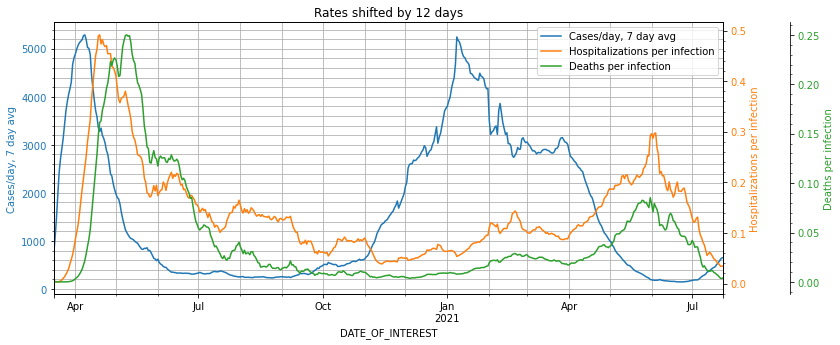

Rates shifted by 13 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.141612   
std             1502.828683                        0.099104   
min              145.428571                        0.002466   
25%              324.571429                        0.074454   
50%              826.071429                        0.117353   
75%             2878.928571                        0.184676   
max             5290.285714                        0.500893   

       Deaths per infection  
count            496.000000  
mean               0.045414  
std                0.058350  
min                0.000000  
25%                0.008819  
50%                0.022748  
75%                0.054652  
max                0.267161

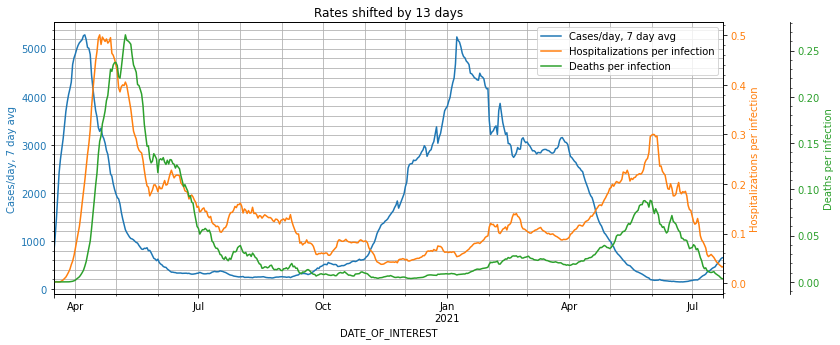

Rates shifted by 14 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.144153   
std             1502.828683                        0.104780   
min              145.428571                        0.001785   
25%              324.571429                        0.073126   
50%              826.071429                        0.117514   
75%             2878.928571                        0.186417   
max             5290.285714                        0.531270   

       Deaths per infection  
count            496.000000  
mean               0.046628  
std                0.060980  
min                0.000000  
25%                0.008681  
50%                0.023020  
75%                0.056006  
max                0.281772

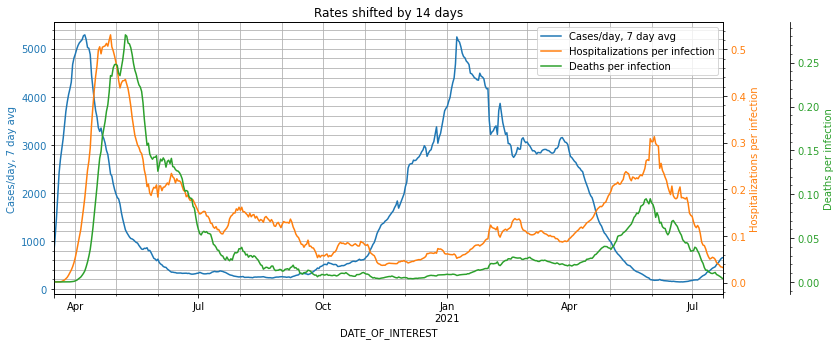

Rates shifted by 15 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.146825   
std             1502.828683                        0.110710   
min              145.428571                        0.001265   
25%              324.571429                        0.071071   
50%              826.071429                        0.118239   
75%             2878.928571                        0.193219   
max             5290.285714                        0.566267   

       Deaths per infection  
count            496.000000  
mean               0.047881  
std                0.063714  
min                0.000000  
25%                0.008525  
50%                0.023277  
75%                0.056206  
max                0.295513

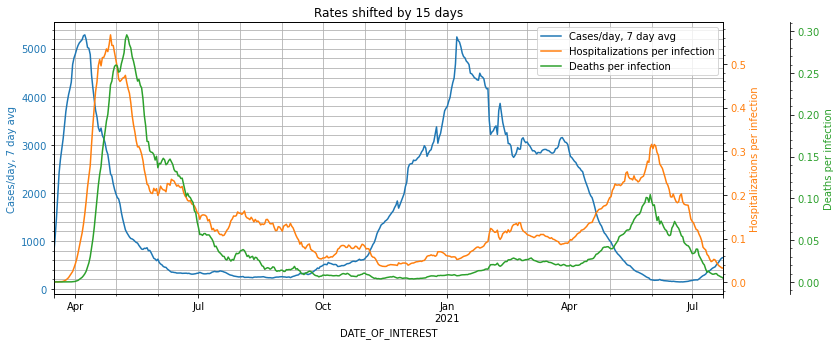

Rates shifted by 16 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      496.000000   
mean            1603.493952                        0.149645   
std             1502.828683                        0.116971   
min              145.428571                        0.000915   
25%              324.571429                        0.069463   
50%              826.071429                        0.119508   
75%             2878.928571                        0.195307   
max             5290.285714                        0.593036   

       Deaths per infection  
count            496.000000  
mean               0.049177  
std                0.066570  
min                0.000000  
25%                0.008376  
50%                0.023503  
75%                0.057917  
max                0.307868

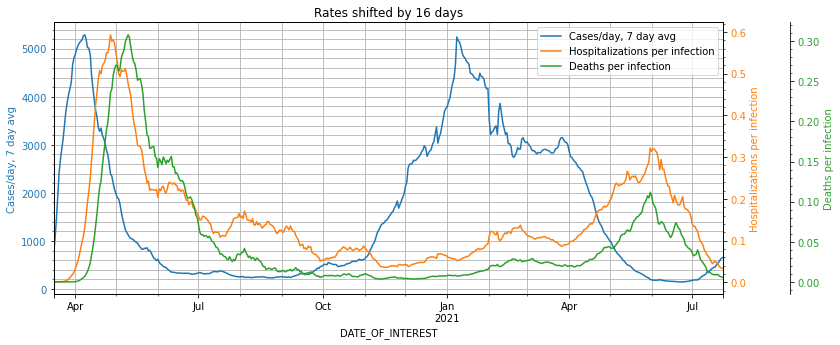

Rates shifted by 17 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      495.000000   
mean            1603.493952                        0.152910   
std             1502.828683                        0.123481   
min              145.428571                        0.000687   
25%              324.571429                        0.066195   
50%              826.071429                        0.119856   
75%             2878.928571                        0.197254   
max             5290.285714                        0.619610   

       Deaths per infection  
count            495.000000  
mean               0.050615  
std                0.069580  
min                0.000000  
25%                0.008315  
50%                0.023541  
75%                0.058480  
max                0.320834

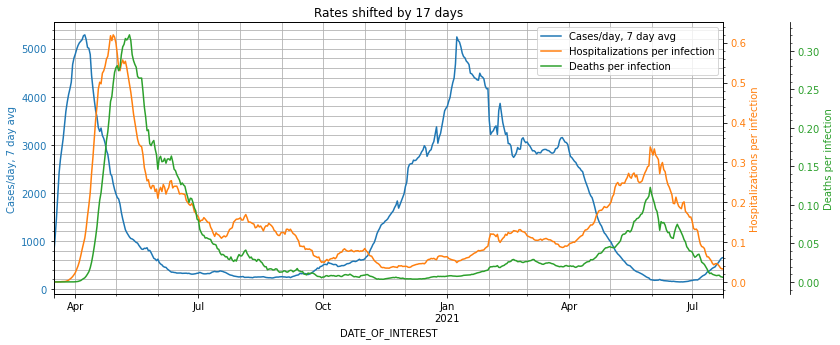

Rates shifted by 18 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      494.000000   
mean            1603.493952                        0.156323   
std             1502.828683                        0.130310   
min              145.428571                        0.000517   
25%              324.571429                        0.065155   
50%              826.071429                        0.119111   
75%             2878.928571                        0.200355   
max             5290.285714                        0.654583   

       Deaths per infection  
count            494.000000  
mean               0.052098  
std                0.072703  
min                0.000000  
25%                0.008142  
50%                0.023504  
75%                0.059904  
max                0.337430

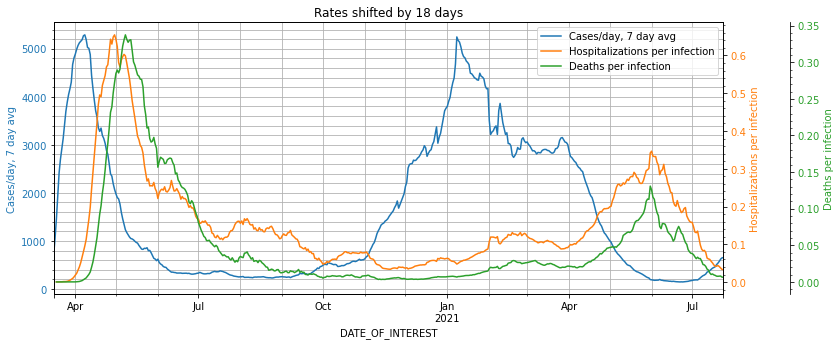

Rates shifted by 19 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      493.000000   
mean            1603.493952                        0.159896   
std             1502.828683                        0.137490   
min              145.428571                        0.000413   
25%              324.571429                        0.064763   
50%              826.071429                        0.119672   
75%             2878.928571                        0.205093   
max             5290.285714                        0.685527   

       Deaths per infection  
count            493.000000  
mean               0.053629  
std                0.075945  
min                0.000000  
25%                0.008100  
50%                0.023507  
75%                0.060099  
max                0.361433

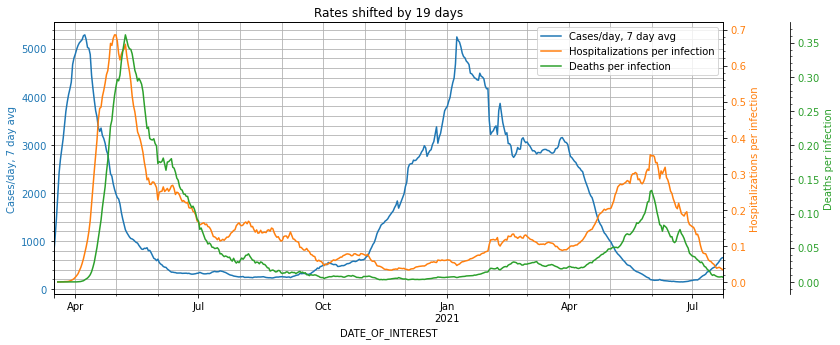

Rates shifted by 20 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      492.000000   
mean            1603.493952                        0.163626   
std             1502.828683                        0.145033   
min              145.428571                        0.000370   
25%              324.571429                        0.065377   
50%              826.071429                        0.120072   
75%             2878.928571                        0.211497   
max             5290.285714                        0.717573   

       Deaths per infection  
count            492.000000  
mean               0.055211  
std                0.079313  
min                0.000000  
25%                0.007996  
50%                0.023830  
75%                0.061395  
max                0.381378

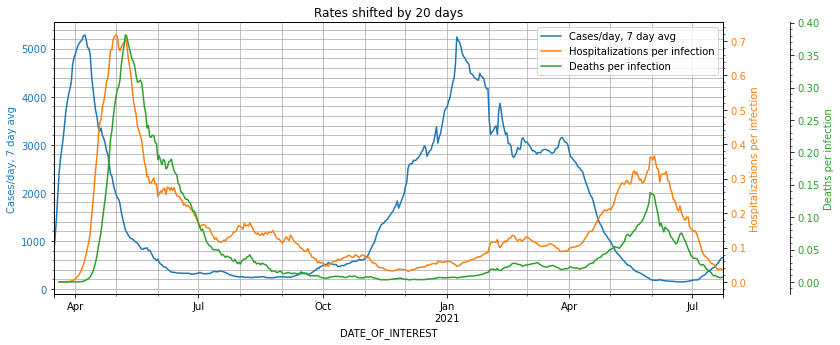

Rates shifted by 21 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      491.000000   
mean            1603.493952                        0.167509   
std             1502.828683                        0.152966   
min              145.428571                        0.000342   
25%              324.571429                        0.064862   
50%              826.071429                        0.120499   
75%             2878.928571                        0.218339   
max             5290.285714                        0.759856   

       Deaths per infection  
count            491.000000  
mean               0.056843  
std                0.082803  
min                0.000000  
25%                0.008040  
50%                0.023934  
75%                0.062034  
max                0.399976

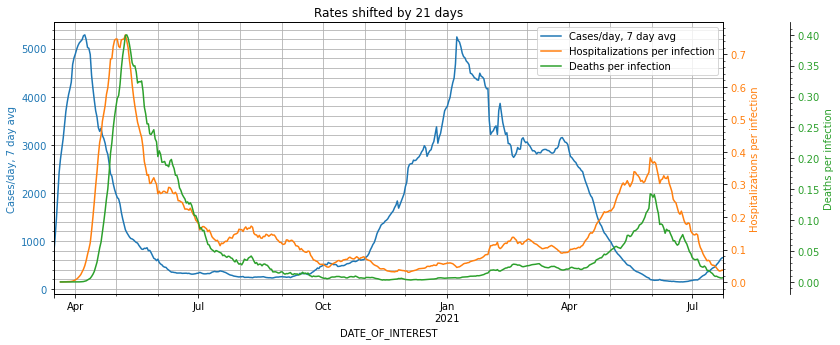

Rates shifted by 22 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      490.000000   
mean            1603.493952                        0.171565   
std             1502.828683                        0.161333   
min              145.428571                        0.000319   
25%              324.571429                        0.063712   
50%              826.071429                        0.121433   
75%             2878.928571                        0.224492   
max             5290.285714                        0.817254   

       Deaths per infection  
count            490.000000  
mean               0.058522  
std                0.086401  
min                0.000000  
25%                0.007985  
50%                0.024052  
75%                0.063200  
max                0.418460

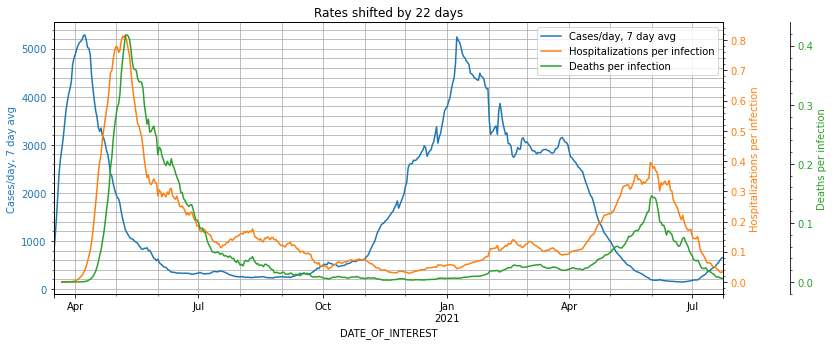

Rates shifted by 23 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      489.000000   
mean            1603.493952                        0.175771   
std             1502.828683                        0.170086   
min              145.428571                        0.000292   
25%              324.571429                        0.062395   
50%              826.071429                        0.121346   
75%             2878.928571                        0.231340   
max             5290.285714                        0.883465   

       Deaths per infection  
count            489.000000  
mean               0.060245  
std                0.090093  
min                0.000000  
25%                0.007959  
50%                0.024345  
75%                0.064140  
max                0.437310

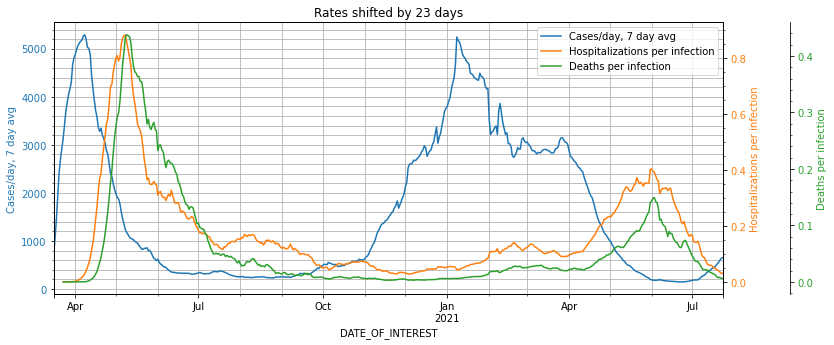

Rates shifted by 24 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      488.000000   
mean            1603.493952                        0.180154   
std             1502.828683                        0.179245   
min              145.428571                        0.000271   
25%              324.571429                        0.062146   
50%              826.071429                        0.121325   
75%             2878.928571                        0.234358   
max             5290.285714                        0.963242   

       Deaths per infection  
count            488.000000  
mean               0.062014  
std                0.093876  
min                0.000000  
25%                0.007862  
50%                0.024334  
75%                0.065770  
max                0.455594

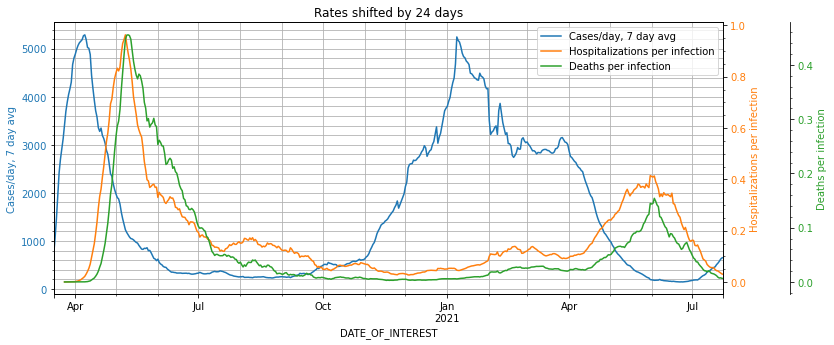

Rates shifted by 25 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      487.000000   
mean            1603.493952                        0.184713   
std             1502.828683                        0.188808   
min              145.428571                        0.000257   
25%              324.571429                        0.061424   
50%              826.071429                        0.123473   
75%             2878.928571                        0.242599   
max             5290.285714                        1.033279   

       Deaths per infection  
count            487.000000  
mean               0.063828  
std                0.097744  
min                0.000000  
25%                0.007750  
50%                0.024424  
75%                0.068519  
max                0.474782

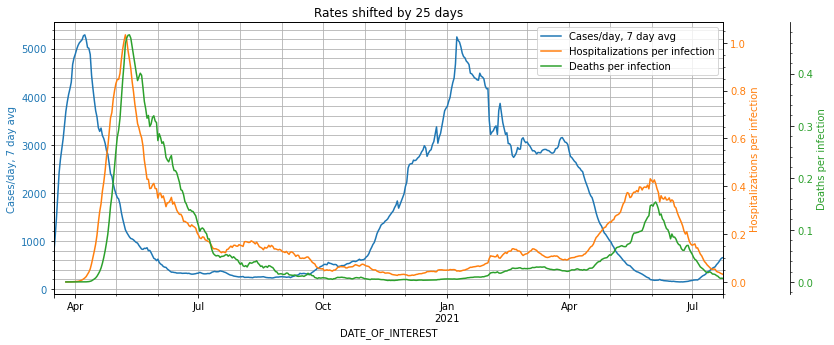

Rates shifted by 26 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      486.000000   
mean            1603.493952                        0.189436   
std             1502.828683                        0.198748   
min              145.428571                        0.000247   
25%              324.571429                        0.060507   
50%              826.071429                        0.124455   
75%             2878.928571                        0.248986   
max             5290.285714                        1.101345   

       Deaths per infection  
count            486.000000  
mean               0.065683  
std                0.101684  
min                0.000000  
25%                0.007634  
50%                0.024866  
75%                0.070464  
max                0.494059

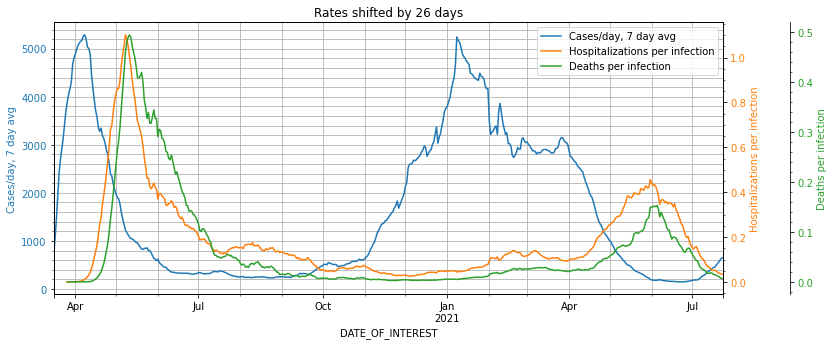

Rates shifted by 27 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      485.000000   
mean            1603.493952                        0.194328   
std             1502.828683                        0.209053   
min              145.428571                        0.000240   
25%              324.571429                        0.059030   
50%              826.071429                        0.125586   
75%             2878.928571                        0.249624   
max             5290.285714                        1.155053   

       Deaths per infection  
count            485.000000  
mean               0.067576  
std                0.105680  
min                0.000000  
25%                0.007558  
50%                0.025093  
75%                0.072619  
max                0.509324

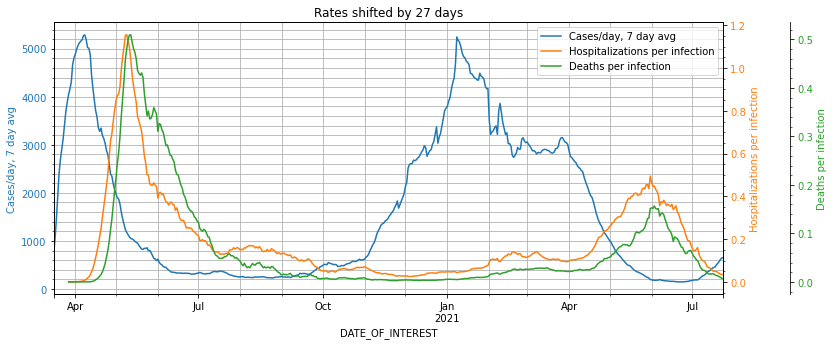

Rates shifted by 28 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      484.000000   
mean            1603.493952                        0.199379   
std             1502.828683                        0.219645   
min              145.428571                        0.000232   
25%              324.571429                        0.057907   
50%              826.071429                        0.125738   
75%             2878.928571                        0.256631   
max             5290.285714                        1.209656   

       Deaths per infection  
count            484.000000  
mean               0.069512  
std                0.109760  
min                0.000000  
25%                0.007491  
50%                0.025399  
75%                0.075173  
max                0.524840

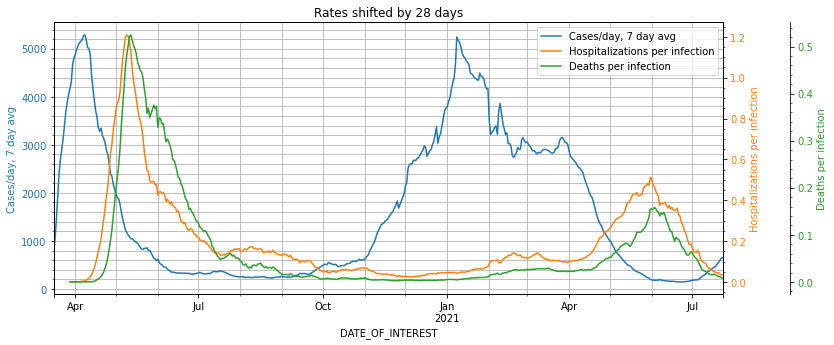

Rates shifted by 29 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      483.000000   
mean            1603.493952                        0.204592   
std             1502.828683                        0.230535   
min              145.428571                        0.000214   
25%              324.571429                        0.057437   
50%              826.071429                        0.128325   
75%             2878.928571                        0.261107   
max             5290.285714                        1.260231   

       Deaths per infection  
count            483.000000  
mean               0.071489  
std                0.113918  
min                0.000000  
25%                0.007478  
50%                0.025405  
75%                0.076600  
max                0.537226

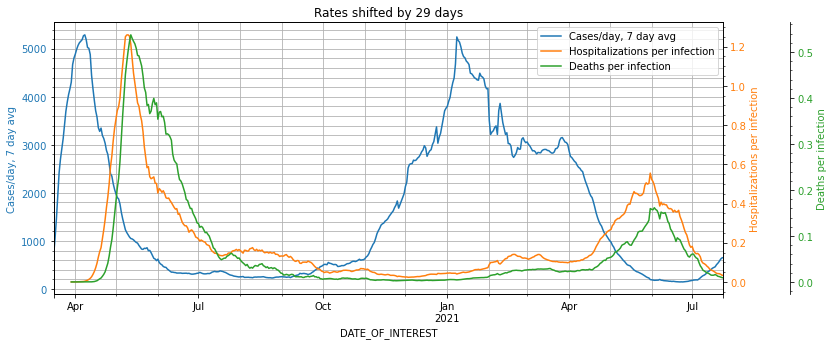

In [19]:
start = "2020/03/15"

statresults = pd.DataFrame(columns=["shift", "h/i mean", "h/i std", "d/i mean", "d/i std"])

for shift in range(-30, 30):
    dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
    dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
    period = dat[dat.index > start]
    u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))
    print(f"Rates shifted by {shift} days")
    stats = period[["Cases/day, 7 day avg",
                    "Hospitalizations per infection",
                    "Deaths per infection"]].describe()
    display(stats)
    plt.title(f"Rates shifted by {shift} days")
    plt.show()

In [20]:
stats

Cases/day, 7 day avg  Hospitalizations per infection  \
count            496.000000                      483.000000   
mean            1603.493952                        0.204592   
std             1502.828683                        0.230535   
min              145.428571                        0.000214   
25%              324.571429                        0.057437   
50%              826.071429                        0.128325   
75%             2878.928571                        0.261107   
max             5290.285714                        1.260231   

       Deaths per infection  
count            483.000000  
mean               0.071489  
std                0.113918  
min                0.000000  
25%                0.007478  
50%                0.025405  
75%                0.076600  
max                0.537226

In [21]:
stats["Cases/day, 7 day avg"]["std"]

1502.8286832401357